In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing

In [2]:
X = pd.read_csv("X.csv", index_col=0)
y = pd.read_csv("y.csv", index_col=0)

# 1. Data preparation and visualisation
We observe a clear imbalance in the data

In [3]:
y['diagnostic'].value_counts()

HGG    283
LGG     76
Name: diagnostic, dtype: int64

<Axes: xlabel='diagnostic', ylabel='count'>

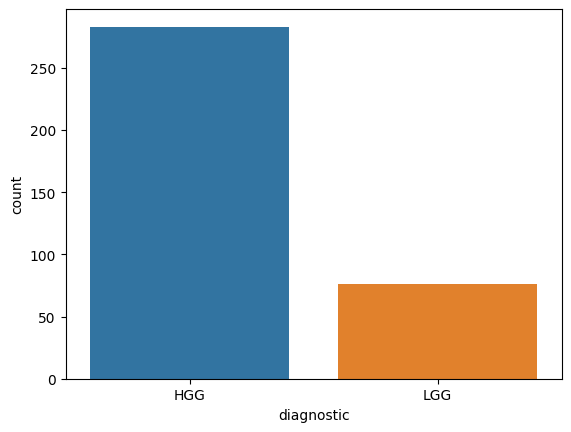

In [4]:
sns.countplot(y, x="diagnostic")

## 1.1 Scale the data
As we can observe in the df, the data is in different units and magnitudes. It's essential to have it standarised.

In [5]:
X_cols = X.columns
X.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,174.0,650.0,2.588828e+09,4.300822,324.0,2.196185,1085.0,357.892864,169.490477,256.0,...,39.698866,39.115214,35.693137,39.874804,15651.083333,29.130457,0.795019,3806.004555,0.243178,15709.0
1,427.0,826.0,1.555094e+09,4.670797,229.5,2.685919,1077.0,626.103994,128.342289,632.0,...,22.671568,23.769729,24.413111,27.000000,3703.416667,18.059959,0.727742,1590.651380,0.429509,3731.0
2,212.0,697.0,6.472778e+09,4.796344,283.0,2.510939,1170.0,459.821288,154.048324,457.0,...,42.720019,46.238512,44.944410,46.914816,26368.250000,37.044511,0.752399,5694.078769,0.215945,26400.0
3,429.9,856.0,6.238777e+09,4.777974,210.0,4.546907,1463.0,633.593407,134.813886,612.0,...,63.820060,36.055513,54.626001,64.327288,14306.666667,26.111726,0.597259,4771.779131,0.333535,14410.0
4,358.0,649.0,1.212578e+10,4.199889,143.0,3.011379,1056.0,508.111091,88.454307,511.0,...,53.665631,57.706152,59.774577,60.646517,44537.541667,43.406304,0.634706,9573.316675,0.214949,44774.0


In [6]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X = pd.DataFrame(X, columns=X_cols)
X.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
0,-0.488695,-0.366814,-0.252830,-0.186079,-0.110929,-0.479849,-0.365803,-0.455121,-0.154468,-0.538264,...,-0.605910,-0.850016,-0.978549,-1.054100,-0.733336,-0.624244,1.295974,-0.829402,-0.240447,-0.733727
1,-0.164202,-0.253907,-0.255839,0.079949,-0.287708,-0.324076,-0.368941,-0.219193,-0.302442,-0.200608,...,-1.692717,-1.639482,-1.565707,-1.677403,-1.069492,-1.554224,0.675161,-1.216625,1.212918,-1.070318
2,-0.439957,-0.336663,-0.241523,0.170223,-0.187627,-0.379733,-0.332468,-0.365461,-0.210000,-0.357762,...,-0.413078,-0.483550,-0.496994,-0.713275,-0.431801,0.040578,0.902686,-0.499384,-0.452869,-0.433301
3,-0.160482,-0.234662,-0.242204,0.157014,-0.324187,0.267861,-0.217558,-0.212605,-0.279169,-0.218569,...,0.933682,-1.007426,0.006961,0.129708,-0.771162,-0.877833,-0.528893,-0.660593,0.464330,-0.770230
4,-0.252700,-0.367455,-0.225067,-0.258654,-0.449522,-0.220555,-0.377177,-0.322984,-0.445885,-0.309269,...,0.285552,0.106416,0.274959,-0.048488,0.079406,0.575001,-0.183346,0.178671,-0.460631,0.083023


## 1.2 Oversampling in the train dataset

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

- Random Oversampling: Randomly duplicate examples in the minority class.
- Random Undersampling: Randomly delete examples in the majority class.
Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [8]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [9]:
X_over, y_over = oversample.fit_resample(X, y)

<Axes: xlabel='diagnostic', ylabel='count'>

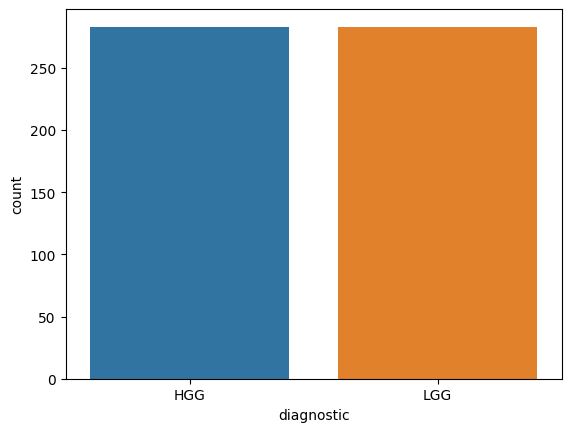

In [10]:
sns.countplot(y_over, x="diagnostic")

## 1.3 Train and test split

In [11]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_over, y_over, test_size=0.20, random_state=11)
X_train1.head()

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume
74,-0.245004,-0.362965,-0.245331,-0.200371,-0.464488,0.459897,-0.208145,-0.325333,-0.429544,-0.321841,...,-0.271101,1.043840,-1.002770,0.844952,-0.640127,-0.849277,-0.786739,-0.438809,0.347313,-0.640488
243,0.233398,-0.065302,-0.058753,-0.089964,-0.260583,-0.491197,-0.169711,0.053295,-0.322837,0.072390,...,0.747402,1.190164,1.079959,0.912596,0.995083,0.965093,-0.963856,1.288350,-0.526092,0.995624
214,-0.655430,-0.695269,-0.259357,-1.426363,-0.612271,0.386168,-0.663470,-0.695076,-0.648852,-0.700805,...,-0.170611,0.396680,0.399602,0.091848,-0.076398,0.097753,-0.692519,0.182751,-0.217905,-0.076618
486,-0.170615,-0.024887,-0.011491,0.745477,0.018148,0.351466,0.411504,-0.027298,0.097985,-0.002146,...,1.305277,1.228192,1.136284,1.056097,1.793750,1.873289,-0.898958,1.892036,-0.704294,1.791101
442,-0.505368,-0.475871,-0.246445,-0.271360,-0.384048,-0.359793,-0.492871,-0.481267,-0.413058,-0.463728,...,0.218288,-0.423123,0.049523,-0.199661,-0.077517,0.021339,-0.134137,0.023130,-0.398774,-0.075381


# 2. Correlation of variables

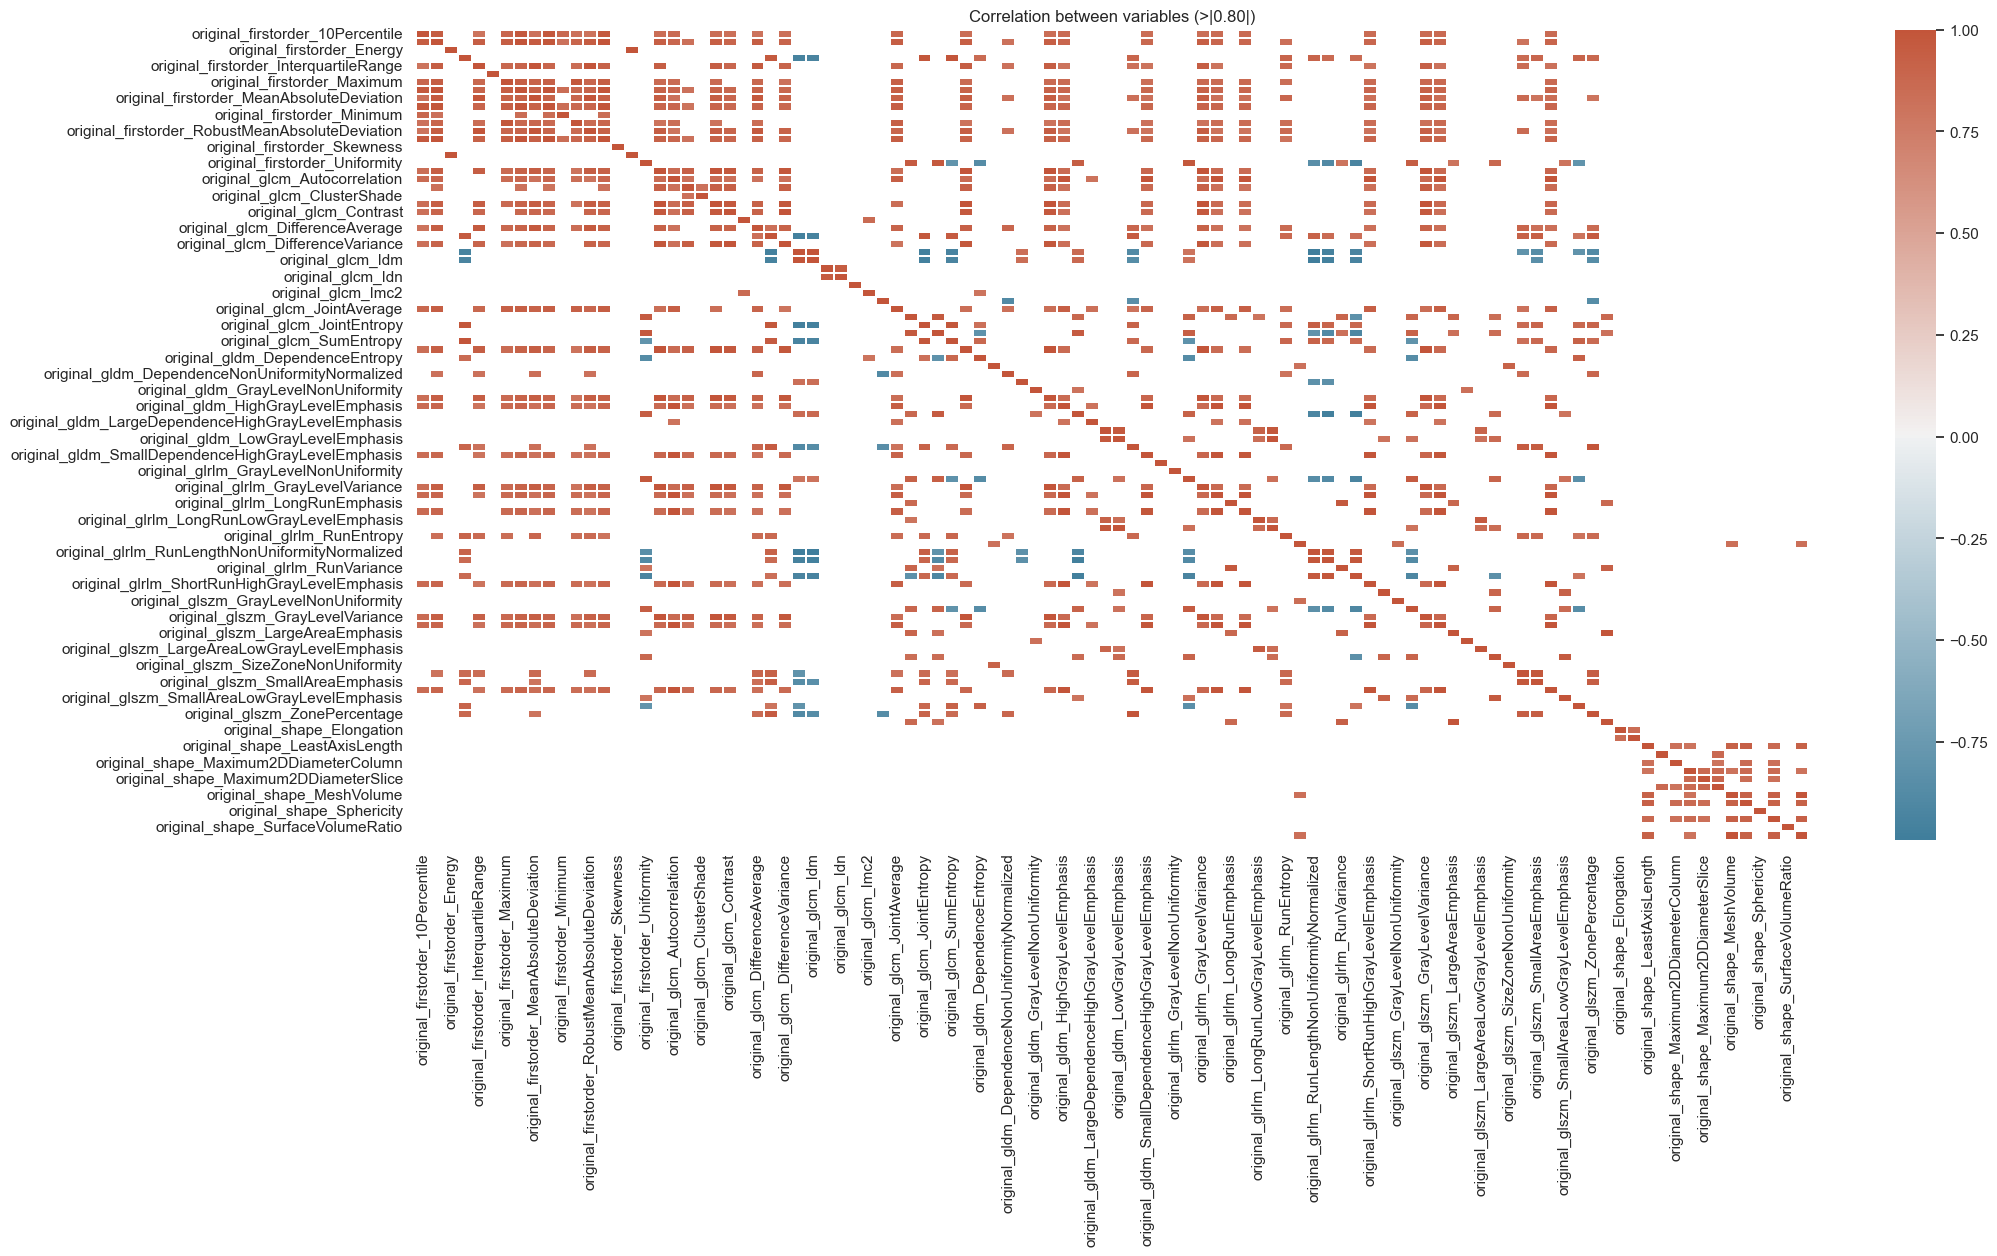

In [39]:
correlation = X.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
masked_corr_matrix = correlation[(correlation > 0.80) | (correlation < -0.80)]
plt.figure(figsize=(20, 10))
sns.heatmap(masked_corr_matrix, 
            cmap=cmap, 
            annot=False, 
            fmt='.2f', 
            linewidths=.05).set_title("Correlation between variables (>|0.80|)")
plt.show()

## 2.1 Clustering + PCA
https://realpython.com/k-means-clustering-python/

In [13]:
import urllib
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(y.diagnostic)
true_labels[:5]

array([0, 0, 0, 0, 0])

In [15]:
n_clusters = len(label_encoder.classes_)
n_clusters

2

In [16]:
preprocessor = Pipeline(
[("pca", PCA(n_components=2, random_state=42)),])

In [17]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [18]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
pipe.fit(X)

C:\Users\EvaCantin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=2, n_init=50,
                                         random_state=42))]))])

In [19]:
preprocessed_data = pipe["preprocessor"].transform(X)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)

0.7356690384348621

In [20]:
adjusted_rand_score(true_labels, predicted_labels)

-0.010888479419068724

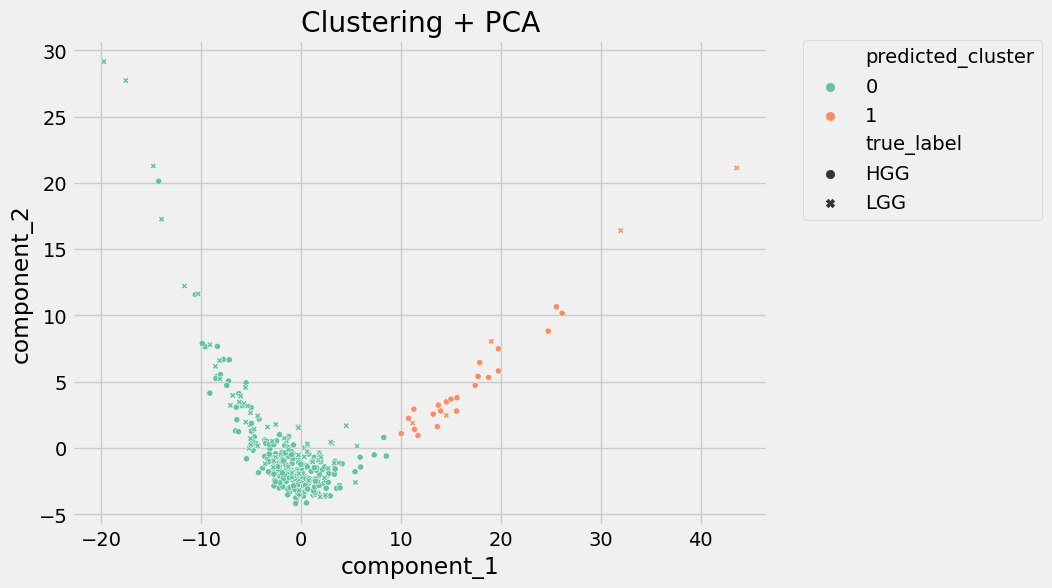

In [21]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(X),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 6))

scat = sns.scatterplot(
    x="component_1",  # Specify the x-axis data
    y="component_2",  # Specify the y-axis data
    s=20,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering + PCA"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()


# 3. Explainable models (JUST PROVES)
https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [23]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# helper function for evaluating a given classifier
def evaluate_classifier(y_test,pred):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.grid(False)
    plt.show()

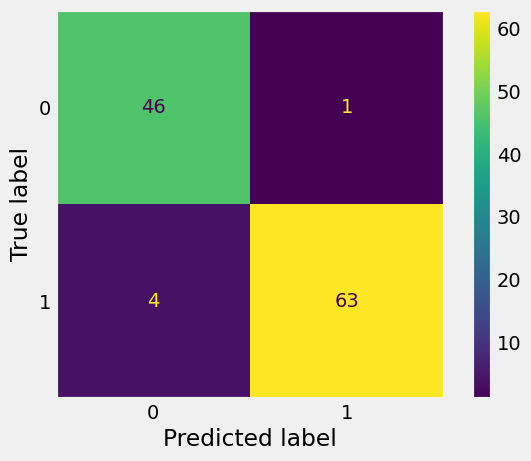

None
              precision    recall  f1-score   support

         HGG       0.92      0.98      0.95        47
         LGG       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [24]:
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

rf_clf.fit(X_train1, y_train1.diagnostic)

# Make prediction on the testing data
y_pred = rf_clf.predict(X_test1)

# Classification Report
print(evaluate_classifier(y_pred, y_test1))
print(classification_report(y_pred, y_test1))

Variable Importance Plot - Global Interpretation


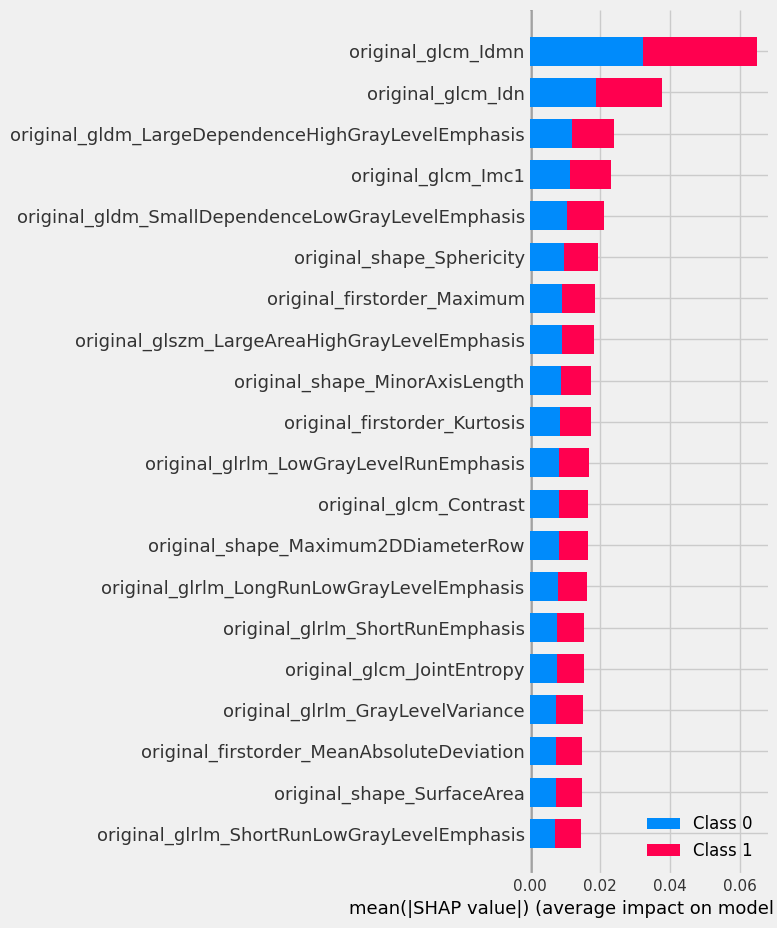

In [25]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test1)
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test1)

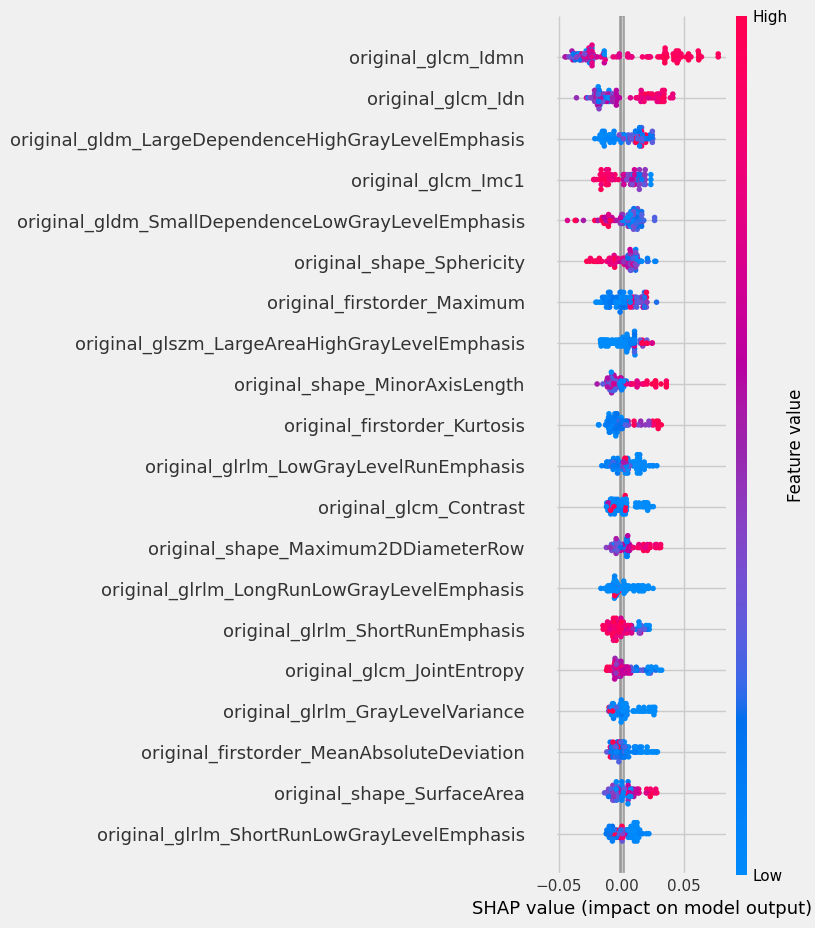

In [26]:
shap.summary_plot(shap_values[1], X_test1)